In [1]:
#Problem Statement : Predict the emotion by using end-to-end pipeline

In [2]:
#Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer , LancasterStemmer , SnowballStemmer , WordNetLemmatizer
import nltk
nltk.download('wordnet')
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer
import pickle
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#nltk.download("punkt")
#nltk.download("")

In [5]:
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\Emotion_classify_Data.csv")

In [6]:
data1=data.copy()

In [7]:
data1.head()


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [8]:
#EDA

In [9]:
data1.describe()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [10]:
#Grouping the data by emotion
grp=data.groupby("Emotion")

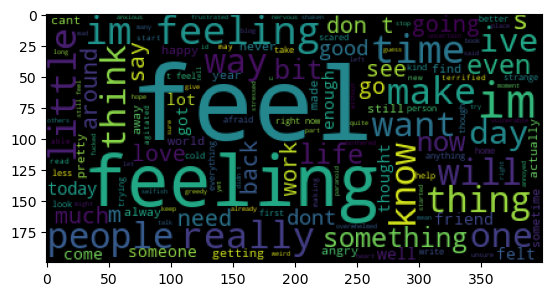

In [11]:
#Wordcloud 
from wordcloud import WordCloud
text=" ".join(i for i in data["Comment"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

In [12]:
#MOst frequent words of emotion "anger"
Counter(" ".join(grp.get_group("anger")["Comment"]).split()).most_common(10)

[('i', 3317),
 ('feel', 1355),
 ('and', 1164),
 ('to', 1078),
 ('the', 1018),
 ('a', 723),
 ('feeling', 669),
 ('that', 652),
 ('of', 579),
 ('my', 528)]

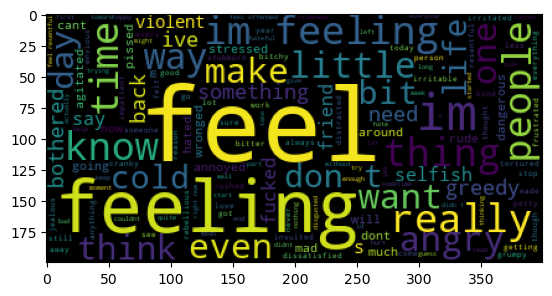

In [13]:
text=" ".join(i for i in grp.get_group("anger")["Comment"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

In [14]:
#MOst frequent words of emotion "fear"
Counter(" ".join(grp.get_group("fear")["Comment"]).split()).most_common(10)

[('i', 3083),
 ('feel', 1212),
 ('to', 1116),
 ('and', 1110),
 ('the', 1000),
 ('a', 806),
 ('feeling', 742),
 ('of', 614),
 ('that', 531),
 ('my', 525)]

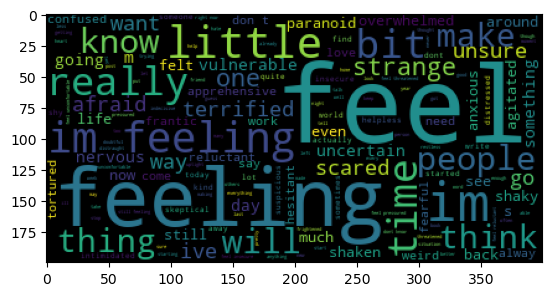

In [15]:
text=" ".join(i for i in grp.get_group("fear")["Comment"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

In [16]:
#MOst frequent words of emotion "joy"
Counter(" ".join(grp.get_group("joy")["Comment"]).split()).most_common(10)

[('i', 3224),
 ('feel', 1480),
 ('and', 1249),
 ('to', 1230),
 ('the', 1153),
 ('a', 790),
 ('that', 680),
 ('of', 617),
 ('feeling', 553),
 ('in', 526)]

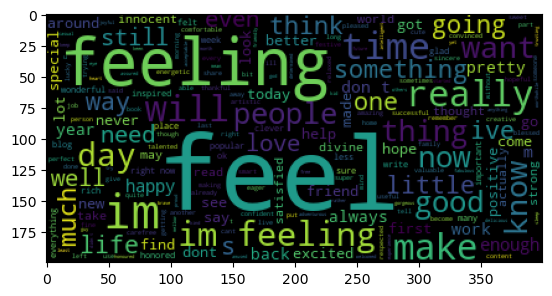

In [17]:
text=" ".join(i for i in grp.get_group("joy")["Comment"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

In [18]:
#Extracting Feature variables and class variables

In [19]:
fv=data1.iloc[:,0] #feature variable
cv=data1.iloc[:,1] #class variable


In [20]:
#Splitting the data train and test

In [21]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2)

In [22]:
#Defining different functions to perform text preprocessing 

In [23]:
def lowers(x):
    return x.str.lower()

In [24]:
def html(x):
    return x.apply(lambda x : re.sub("<.+?>"," ",x))

In [25]:
def url(x):
    return x.apply(lambda x:re.sub("http[s]?://.+? +"," ",x))

In [26]:
def unw(x):
    return x.apply(lambda x:re.sub("[]:()*\-.,@#!?/$%^&0-9]"," ",x))

In [27]:
stp=stopwords.words("english")
stp.remove("not")

In [28]:
def stp1(x):
   l=[]
   for word in word_tokenize(x):

          if word in stp:
             pass
          elif len(word)<=2:
             pass
          else:
            l.append(word)
   return " ".join(l)

In [29]:
def stpp(x):
    return x.apply(lambda x : stp1(x))

In [30]:
#Pipeline to perform Text preprocessing

In [31]:
pre_pro_ppline=Pipeline([("lower",FunctionTransformer(lowers)),("html",FunctionTransformer(html))
                         ,("url",FunctionTransformer(url)),("unw",FunctionTransformer(unw)),
                         ("stp",FunctionTransformer(stpp))])

In [32]:
pre_pro_ppline

Pipeline(steps=[('lower',
                 FunctionTransformer(func=<function lowers at 0x00000251C0198040>)),
                ('html',
                 FunctionTransformer(func=<function html at 0x00000251C01983A0>)),
                ('url',
                 FunctionTransformer(func=<function url at 0x00000251C0198700>)),
                ('unw',
                 FunctionTransformer(func=<function unw at 0x00000251C0198D30>)),
                ('stp',
                 FunctionTransformer(func=<function stpp at 0x00000251C017F7F0>))])

In [33]:
#Final pipeline to perform data transformation

In [34]:
final_ppline=Pipeline([("Pre_process",pre_pro_ppline),("Count_vector",CountVectorizer())])

In [35]:
mb=MultinomialNB() #Using mulitnomial Naive bayes to predict emotion

In [36]:
#Fitting the model
model=mb.fit(final_ppline.fit_transform(x_train),y_train)

In [37]:
#Dumping final_pipeline
pickle.dump(final_ppline,open(r"C:\Users\LENOVO\Downloads\tpp1.pkl","wb"))

In [38]:
#Dumping model
pickle.dump(model,open(r"C:\Users\LENOVO\Downloads\tmodel1.pkl","wb"))